![Снимок экрана от 2025-06-10 08-23-55.png](<attachment:Снимок экрана от 2025-06-10 08-23-55.png>)
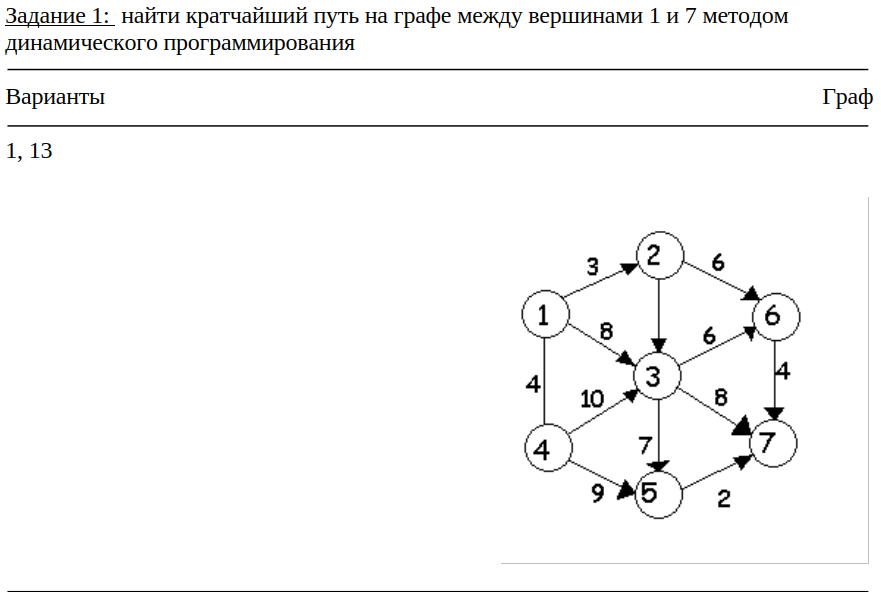

In [2]:
import numpy as np
def array_to_sets_modif(arr):
    # Если это скалярное значение (число)
    if np.isscalar(arr):
        return arr  # или arr + 1, если нужно увеличить само значение
    
    # Если это список/массив
    if isinstance(arr, (list, np.ndarray)):
        if len(arr) > 0 and isinstance(arr[0], (list, tuple)):
            # Для двумерного массива
            return [[x + 1 for x in row] for row in arr]
        else:
            # Для одномерного массива
            return [x + 1 for x in arr]
    
    # Если это другой тип (например, кортеж)
    return arr

In [ ]:


dp_matrix = [
    [0, 3, 8, 4, 0, 0, 0],
    [3, 0, 3, 0, 0, 6, 0],
    [8, 3, 0, 10, 7, 6, 8],
    [4, 0, 10, 0, 9, 0, 0],
    [0, 0, 7, 9, 0, 0, 2],
    [0, 6, 6, 0, 0, 0, 4],
    [0, 0, 8, 0, 2, 4, 0]
]

def dynamic_programming_shortest_path(matrix, start):
    n = len(matrix)
    dist = [float('inf')] * n
    dist[start] = 0

    parent = [-1] * n # Инициализируем массив предков для восстановления путей
    parent[start] = start  # Начальная вершина - сама себе родитель

    for _ in range(n - 1):
        for v in range(n):
            for u in range(n):
                if matrix[u][v] > 0:  # Если есть ребро u -> v
                    if dist[u] + matrix[u][v] < dist[v]:
                        dist[v] = dist[u] + matrix[u][v]
                        parent[v] = u  # Обновляем родителя вершины v

    # Восстанавливаем пути для всех вершин
    paths = []
    for i in range(n):
        if dist[i] == float('inf'): # Если расстояние бесконечность, то вершина недостижима из стартовой вершины
            paths.append("Нет пути")
            continue
        
        path = []
        current = i
        while current != parent[current]: # Добавляем индексы вершин пока не дойдем до стартовой(её предок это она сама)
            path.append(str(current+1))
            current = parent[current]  # Переходим к родителю вершины
        path.append(str(start+1)) # Добавляем стартовую 
        path.reverse() # Разворачиваем
        paths.append("->".join(path))
    
    return dist, paths

distances, paths = dynamic_programming_shortest_path(dp_matrix, 0)

print("Кратчайшие пути от вершины 1:")
for i in range(len(distances)):
    print(f"До вершины {i+1}: путь {paths[i]}, расстояние {distances[i]}")

Кратчайшие пути от вершины 1:
До вершины 1: путь 1, расстояние 0
До вершины 2: путь 1->2, расстояние 3
До вершины 3: путь 1->2->3, расстояние 6
До вершины 4: путь 1->4, расстояние 4
До вершины 5: путь 1->2->3->5, расстояние 13
До вершины 6: путь 1->2->6, расстояние 9
До вершины 7: путь 1->2->6->7, расстояние 13


![Снимок экрана от 2025-06-10 08-24-46.png](<attachment:Снимок экрана от 2025-06-10 08-24-46.png>)
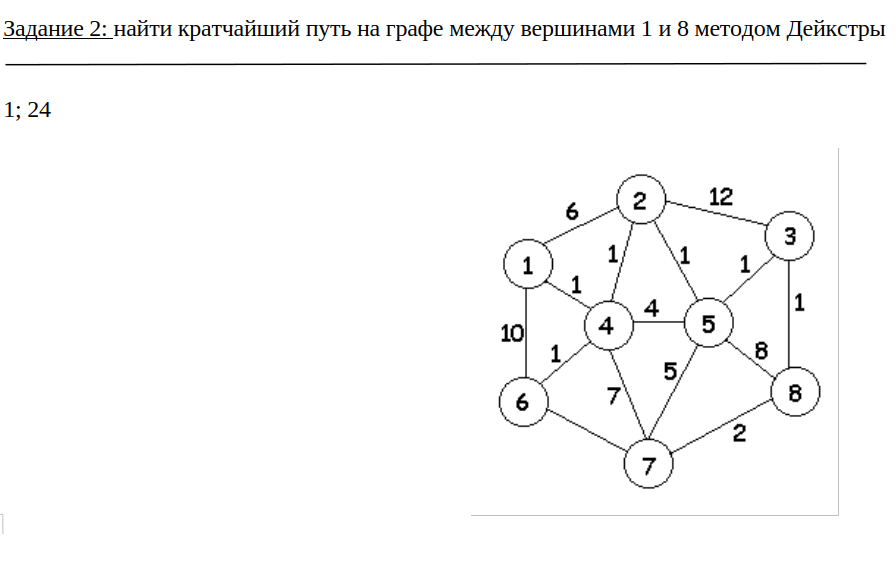

In [ ]:
import heapq

dijkstra_matrix = [
    [0, 6, 0, 1, 0, 10, 0, 0],
    [6, 0, 12, 1, 1, 0, 0, 0],
    [0, 12, 0, 0, 1, 0, 0, 1],
    [1, 1, 0, 0, 4, 1, 7, 0],
    [0, 1, 1, 4, 0, 0, 5, 8],
    [10, 0, 0, 1, 0, 0, 3, 0],
    [0, 0, 0, 7, 5, 3, 0, 2],
    [0, 0, 1, 0, 8, 0, 2, 0]
]

def dijkstra_adj_matrix(matrix, start):
    n = len(matrix)
    dist = [float('inf')] * n
    dist[start] = 0
    heap = [(0, start)]
    prev = [-1] * n  # Храним предков для восстановления путей
    
    # Преобразуем матрицу: нули (кроме диагонали) → inf
    adj = [[float('inf') if i != j and matrix[i][j] == 0 else matrix[i][j] 
            for j in range(n)] 
            for i in range(n)]

    while heap:
        current_dist, u = heapq.heappop(heap)
        if current_dist > dist[u]:
            continue
        for v in range(n):
            if adj[u][v] != float('inf'):
                if dist[u] + adj[u][v] < dist[v]:
                    dist[v] = dist[u] + adj[u][v]
                    prev[v] = u  # Запоминаем предка вершины v
                    heapq.heappush(heap, (dist[v], v))

    # Восстанавливаем пути
    paths = []
    for i in range(n):
        if dist[i] == float('inf'): # Если расстояние бесконечность, то вершина недостижима из стартовой вершины
            paths.append("Нет пути")
            continue
        
        path = []
        current = i
        while current != -1: # Добавляем индексы вершин пока не дойдем до стартовой(её предок это она сама)
            path.append(str(current+1))
            current = prev[current] # Переходим к родителю вершины
        path.reverse()  # Разворачиваем
        paths.append("->".join(path))
    
    return dist, paths

distances, paths = dijkstra_adj_matrix(dijkstra_matrix, 0)

print("Кратчайшие пути от вершины 1:")
for i in range(len(distances)):
    print(f"До вершины {i+1}: путь {paths[i]}, расстояние {distances[i]}")

Кратчайшие пути от вершины 1:
До вершины 1: путь 1, расстояние 0
До вершины 2: путь 1->4->2, расстояние 2
До вершины 3: путь 1->4->2->5->3, расстояние 4
До вершины 4: путь 1->4, расстояние 1
До вершины 5: путь 1->4->2->5, расстояние 3
До вершины 6: путь 1->4->6, расстояние 2
До вершины 7: путь 1->4->6->7, расстояние 5
До вершины 8: путь 1->4->2->5->3->8, расстояние 5
